Random matrices are the first place where many body type techniques really come to the foreground.
A random potential V(x)
You can ask about the effective green's function
But also can check the answer by comparing it to a statistical monte carlo sampling.
Very convenient.


Contour integral of resolvent will count eigenvalues.
Contour integral can be squeezed into two line integrals with E just slightly displaced in complex plane.
hence GAdv and GRet
It also may be of intrest to include the Keldysh green's functions

In [1]:
import numpy as np

In [7]:
def H(E, V):
    return Hmat + np.diag(V) - E
def G(E, V):
    return np.linalg.inv(H(E, V))
def H0(E):
    return H(E, np.zeros(N))
def G0(E):
    return G(E, np.zeros(N))

def rho(E, eps=0.01):
    return GAdv(E, eps) - GRet(E, eps)

def GAdv(E, eps=0.01):
    return G(E+1.j*eps)

def GRet(E, eps=0.01):
    return G(E-1.j*eps)



Might be fun to do born series using infinite series tricks.
Recursion is fun too though.
Pass in already computed G0 so it doesn't recompute it a billion times.

Reader monad may be convenient for passing E and V

In [ ]:
def Born(G0, V, n):
    if n == 0:
        return G0
    else:
        return G0 + G0 @ np.diag(V) @ Born(G0,V,n-1)

In [ ]:
def Born2(G0, V, n):
    if n == 0:
        return G0
    else:
        return G0 + Born(G0,V,n-1) @ np.diag(V) @ G0

In [ ]:
def TMat(G0, V, n):
    if n == 0:
        return np.diag(V)
    else:
        return np.diag(V) + TMat(G0,V,n-1) @ G0

The avergaing over V step ~ Iteration step in Hartee-Fock
The feynman prescription to set the fermi surface
Spatial density from G
fill up to mu
integrate 
newV = integrate diag of rho(E)

or.
Form 2 particle green from 1
GG-GG





In [2]:
from scipy.linalg import circulant
N = 200
firstcol = np.zeros(N)
firstcol[0] = -2 + 100
firstcol[1] = 1
firstcol[-1] = 1

Hmat = circulant(firstcol)



In [28]:
def Vrand():
    return   6* np.random.randn(N)

samples = 1000
Gs = np.zeros( (N, N, samples) )
eigs = np.zeros((N, samples))

for sample in range(samples):
    V = Vrand()
    Gs[:,:,sample] = np.linalg.inv(Hmat + np.diag(V))
    eigs[:,sample] = np.linalg.eigvalsh(Hmat + np.diag(V))
avgG = np.average(Gs, axis=2)


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

Spectrum of eigenvalues using Havg = Hmat, since Vavg = 0

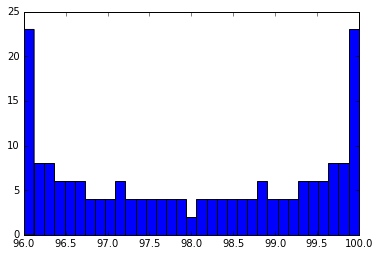

In [12]:
a,b,c = plt.hist(1/np.linalg.eigvalsh(np.linalg.inv(Hmat)), N//6)

Spectrum using avgG as the spectrum

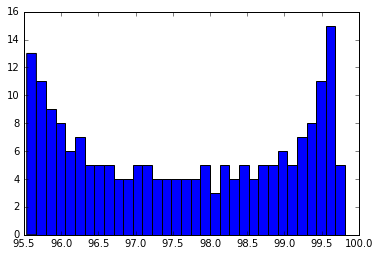

In [29]:
a,b,c = plt.hist(1/np.linalg.eigvalsh(avgG), N//6)

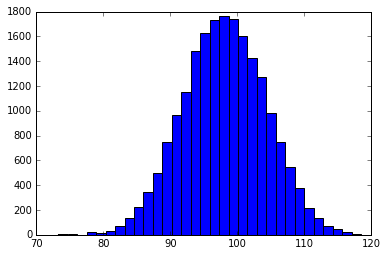

In [30]:
a,b,c = plt.hist(eigs[:,:100].flatten(), N//6)

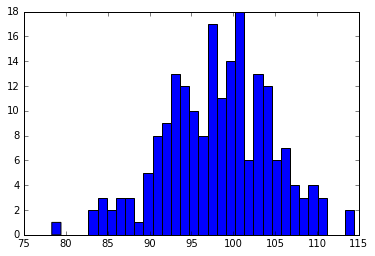

In [32]:
a,b,c = plt.hist(eigs[:,0].flatten(), N//6)

So here a question: What should I compare? Eigenvalue spectrum isn't too bad a thing to look at.
More specific things might be transport
The eigenvalues that show way off seem to be numerical error from nearly uninvertible matrices.
The 

/usr/local/lib/python3.5/site-packages/numpy/lib/function_base.py:753: ComplexWarning: Casting complex values to real discards the imaginary part
  tmp_a_data = tmp_a.astype(float)
/usr/local/lib/python3.5/site-packages/numpy/lib/function_base.py:759: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = tmp_a.astype(np.intp)


ValueError: The first argument of bincount must be non-negative

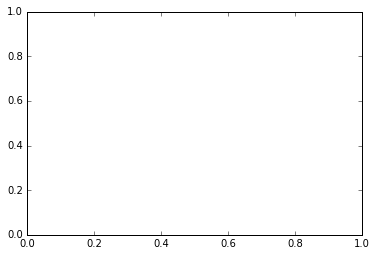

In [30]:
a,b,c = plt.hist(1/np.linalg.eigvalsh(Hmat), N//6)

In [ ]:
#vs is (Nsite,Nparticle) array
def dag(vs):
    return lambda ws: np.det(np.dot(vs.T, ws))

#use list for implied summation
#python list? or numpy dim for summation?
# could use doubling trick.
# don't expect list to decrease
# but then vectors need to carry around index of filling level
def plus(v1s, v2s):
    concat(v1s, v2s)
    
def plus2():

Keldysh?
Periodic BC for real part
AntiPeriodic for imag
= Conjugate periodic BC

Time dependence ->
Adiabatic Turn on Behavior
And Conjugate Dynamics on backwards path


